<h1 style="color:blue;text-align:center"> R Bootcamp - Part I </h1>

<h2 style="color:red;text-align:center"> Venki Uddameri, Ph.D. P.E.</h2>

<center> <h4>  Lesson 12 - Solving First-Order Ordinary Differential Equations </h4> </center>

<hr style="height:4px;border-width:0;background-color:blue">

<h3 id="ODE" style="color:purple"> What are Ordinary Differential Equations (ODEs)? </h3>

Ordinary Differential Equations (ODEs) arise in a wide range of engineering problems.  In particular, system of first-order ODEs explain various engineering phenomena such as - displacement of interconnected elastic bodies, concentrations in reactors, steady-state flow of fluids and pollutants in rivers and even energy balance of the Earth.  You will learn how to solve ODEs in your early calculus classes.  A generic ODE can be written as:
<div style="width:0; float:left;">
$$
\frac{dy}{dt} = f(y,t,A,B)
$$
</div>

Where, y is the dependent variable, t is the independent variable, A and B are constants and f(y,t,A,B) is a function of y and t and employs constants A and B.  <strong><font color='blue'> Note y can either be a scalar or a vector. </font> </strong>  Also as the derivative term is only raised to power 1, this is a first-order ODE.

Solving a first-order ODE also requires us to know the value of y at time t=0.  Herefore, the first-order ODEs are called initial value problems. <strong> <font color='blue'>The specification of y(t=0) is called initial conditions.</font></strong>

<h3 style="color:purple"> Solving ODEs </h3>

You probably learned many methods to solve ODEs in your calculus classes.  These methods are referred to as <strong> analytical solutions </b>.  In other words, they use mathematical methods to obtain an exact solution of the ODE.  While symbolic algebra can be used to solve ODEs analytically using a computer, <strong> numerical solutions </strong> are more common.  <font color='blue'> Numerical solutions discretize the time and approximately solve the ODE by converting them into a system of algebraic equations.  

Understanding numerical solutions to ODE is outside the scope here.  However, there are many resources available on the web.  The [NPTEL Course on ODEs](https://archive.nptel.ac.in/courses/111/104/111104030/) could be of interest to you all.  An introduction to the Runge-Kutta Methods which are commonly used to solve ODEs can be [found here](https://www.youtube.com/watch?v=b-OSyxOpxKc&list=PLYdroRCLMg5PhZqzEJJlyLo55-1Vdd4Bd&index=2)

<h4> <font color = 'brown'> Numerical Solution Basic Idea </font> </h4>

The basic idea of numerical solutions are as follows.  We approximate the solution at $t_1$ using the knowledge of the function at $t_o$ using the slope and timestep (h).  We continue to refine the slope until our approximation matches the original but unknown solution.

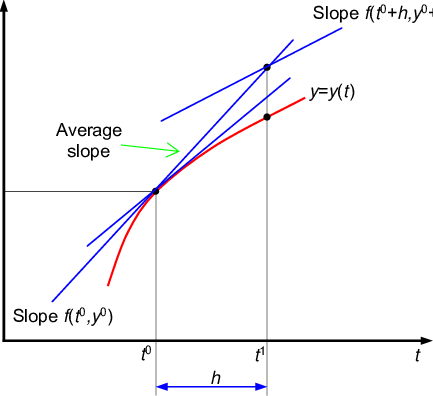

<h3 style="color:purple"> Solving ODEs using R </h3>

<h4> <font color='brown'> Installing deSolve Package </font>

The most common package to solve first-order ODEs in R is the [deSolve package](http://desolve.r-forge.r-project.org/).  You can install this package using R or RStudio using the install.packages('deSolve') command. 

In [1]:
install.packages('deSolve')

Installing package into ‘/home/vuddameri/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



<center> <font color='red'> <strong> You only need to install the package once </strong> </font> </center>

<h4> <font color='brown'> Using the deSolve Package </font>

The deSolve package offers many functions to solve ODEs.  We are going to make use of the <strong><font color='red'> lsoda </font></strong>.  The lsoda function requires the ODE to be expressed in the form shown below:
<div style="width:0; float:left;">
$$
\frac{dy}{dt} = f(t,y,A,B)
$$
</div>

We need to know the values of A, B as well as the initial condition of y (y @ t=0) as well as the various times, t when the values of y are to be known.  <strong> We also need to write a function f on the RHS of the ODE in a specific format: f(t,y.par). </strong> The par is a vector of values A and B.  We can then call the lsoda.  An illustrative example is easy to follow:

<h3> <font color='purple'> Illustrative Example </font>

Solve the following differential equation assuming the initial condition of C(t=0) is 100.  Also $k_d$ is 0.01 and $k_p$= 1.2
<div style="width:0; float:left;">
$$
\frac{dC}{dt} = k_p - k_d \times C \quad \text{and} \quad C(t=0) = C_o
$$
</div>

<h4> <font color='brown'> Step 1: Write the function for RHS </font></h4>

In [31]:
# Function for the RHS of the ODE
dcdt <- function(t,C,par){
    kp = par[1]  # Parse the par list to make the function intuitive
    kd = par[2]
    dc = kp - kd*C  # RHS of ODE
    dcx = list(dc)  # this function must always return a list
    return(dcx)
}

<h4> <font color='brown'> Step 2: Setup the Parameters to call lsoda Function </font></h4>

In [32]:
par <- c(1.2,0.01)  # Parameter list
tx <- seq(0,365,0.25) # Values of t where C is needed
yo <- c(C=100) # initial conditions

<h4> <font color='brown'> Step 3: Call lsoda Function </font></h4>

In [33]:
library(deSolve)  # load library to the memory
C <- lsoda(yo,tx,dcdt,par)  # call the function with the parameters (initial condition, times,function,parameters)

In [34]:
head(C)  # see the first few results

time C       
[1,] 0.00 100.0000
[2,] 0.25 100.0499
[3,] 0.50 100.0998
[4,] 0.75 100.1494
[5,] 1.00 100.1990
[6,] 1.25 100.2484

<h4> <font color='brown'> Step 4: Plot the Results </font></h4>

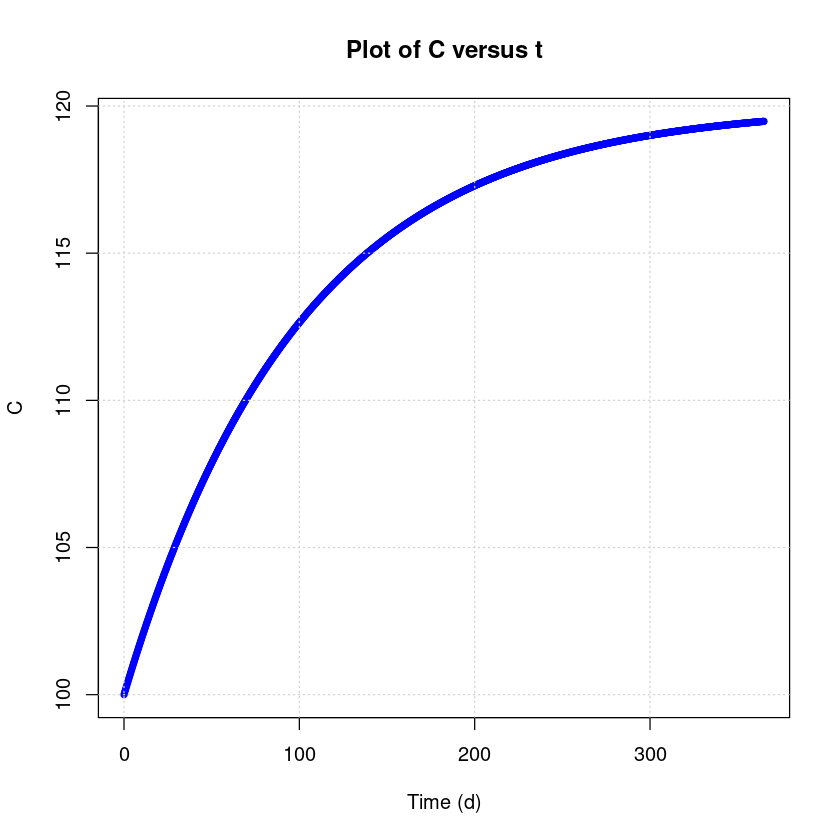

In [39]:
plot(C[,1],C[,2],pch=20,col='blue',
    xlab = 'Time (d)',
    ylab = 'C',
    main ='Plot of C versus t')
grid()